In [115]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.utils import np_utils


batch_size = 128
num_classes = 10
epochs = 10

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

model = Sequential()
model.add(Dense(20, activation='relu', name='layer1', input_shape=(784,)))
model.add(Dense(20, activation='relu' ,name = 'layer2'))
model.add(Dense(10, activation='softmax', name='layer3'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

history = model.fit(x_train, y_train,
                    batch_size=batch_size, nb_epoch=epochs,
                    verbose=0,
                    validation_data=(x_test, y_test),
                    callbacks=[tbCallBack])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])

print('Test accuracy:', score[1])


60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   

C:\Users\oleg\Anaconda3\envs\superman\lib\site-packages\keras\models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '



layer1 (Dense)               (None, 20)                15700     
_________________________________________________________________
layer2 (Dense)               (None, 20)                420       
_________________________________________________________________
layer3 (Dense)               (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.152650475007
Test accuracy: 0.9546


#what's inside?

```
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)


history = model.fit(x_train, y_train,
                    batch_size=batch_size, nb_epoch=epochs,
                    verbose=0,
                    validation_data=(x_test, y_test),
                    callbacks=[tbCallBack])
```



while running do this

```
(C:\Users\oleg\Anaconda3\envs\superman) C:\Users\oleg\PycharmProjects\deep>tensorboard  --logdir Graph/

```

and enjoy results visiting

Starting TensorBoard b'41' on port 6006
(You can navigate to http://192.168.178.185:6006)





# we need to go deeper

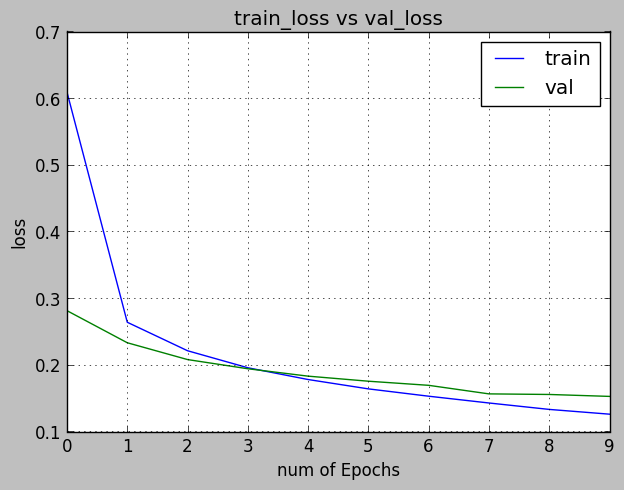

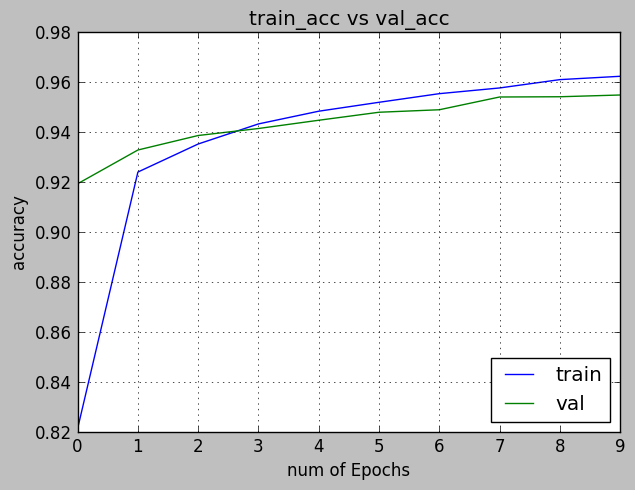

In [116]:
import matplotlib.pyplot as plt

hist = history

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(epochs)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])


plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print(plt.style.available) # use bmh, classic,ggplot for big pictures
plt.style.use('classic')
plt.show()

In [117]:
from keras import backend as K

# with a Sequential model
get_3rd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[0].output])
layer_output = get_3rd_layer_output([x_test[0:1]])[0]
layer_output



array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  2.89364171,  0.        ,  3.84716153,
         1.74450862,  8.11650276,  0.42096204,  2.15673256,  0.        ,
         1.68031645,  4.83741617,  3.80539703,  0.        ,  4.5138402 ]], dtype=float32)

https://transcranial.github.io/keras-js/#/imdb-bidirectional-lstm
https://blog.keras.io/category/demo.html

In [133]:
from keras import backend as K

# get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers])

layer_name='layer2'

# build a loss function that maximizes the activation
# of the nth filter of the layer considered
layer_output = layer_dict[layer_name].output
loss = K.mean(layer_output)

input_img = model.input
# compute the gradient of the input picture wrt this loss
grads = K.gradients(loss, input_img)

# normalization trick: we normalize the gradient
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

# this function returns the loss and grads given the input picture
iterate = K.function([input_img], [loss, grads])
# step size for gradient ascent
step = 1.

In [134]:
import numpy as np

# we start from a gray image with some noise
d = np.copy(x_test[2])
input_img_data = np.expand_dims(np.copy(d),axis=0)
print(input_img_data.shape)
# run gradient ascent for 20 steps

for i in range(30):
    loss_value, grads_value = iterate([input_img_data])
    grads_value = np.reshape(grads_value,(1, 784))
    input_img_data += grads_value * step



(1, 784)


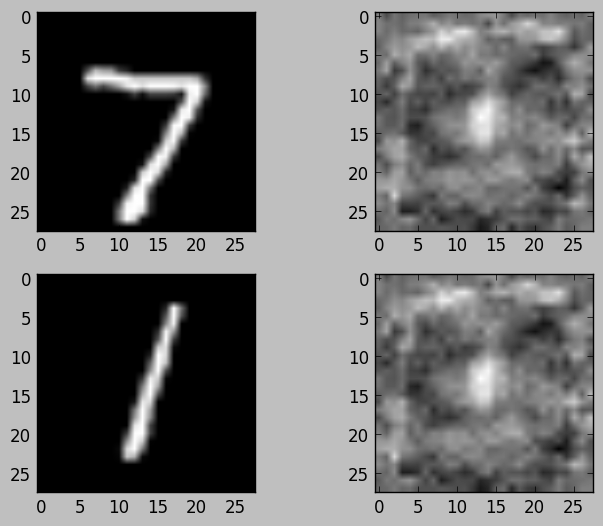

In [135]:
from scipy.misc import imsave

# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    
    return x

img = input_img_data
img = deprocess_image(img)
img = np.reshape(img, (28,28))

import matplotlib.pyplot as plt

import numpy as np

plt.subplot(221)
plt.imshow(np.reshape(x_test[0],(28,28)), cmap=plt.get_cmap('gray'))
plt.subplot(222)
#plt.imshow(np.reshape(255- x_train[0], (28,28)), cmap=plt.get_cmap('gray'))
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.subplot(223)
#plt.imshow(np.reshape(x_train[0], (28,28)), cmap=plt.get_cmap('gray'))
plt.imshow(np.reshape(x_test[2],(28,28)), cmap=plt.get_cmap('gray'))
plt.subplot(224)
#plt.imshow(np.reshape(x_train[3], (28,28)), cmap=plt.get_cmap('gray'))
plt.imshow(img, cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

